In [80]:
### Week 3 Census Data Exploration Assignment by Maya Coronado 
### Data Source: LA Geo Hub Median Income 2022 Data
### Description: I will be looking at census tract data in LA County for median household income
### to understand the financial wellbeing of residents and identify wealth disparities through maps and graphs. 

In [69]:
# First, I'll import the pandas library 

In [3]:
import pandas as pd

In [5]:
# Now it's time to load the data file. load a data file
df = pd.read_csv('Median_Income_and_AMI_(census_tract).csv')

In [6]:
# Now that it is uploaded, we'll look at the data size. 

In [7]:
df.shape

(2495, 13)

In [8]:
# Then, we'll run the head command. I am NOT going to run all the data using the command, set_option, as it's pretty large.

In [9]:
# Looking at data types. 
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tract                   2495 non-null   int64  
 1   med_hh_income           2458 non-null   float64
 2   med_hh_income_universe  2495 non-null   int64  
 3   ami_category            2458 non-null   object 
 4   below_med_income        2458 non-null   object 
 5   below_60pct_med_income  2458 non-null   object 
 6   below_moderate_income   2458 non-null   object 
 7   sup_dist                2495 non-null   object 
 8   csa                     2495 non-null   object 
 9   spa                     2495 non-null   object 
 10  ESRI_OID                2495 non-null   int64  
 11  Shape__Area             2495 non-null   float64
 12  Shape__Length           2495 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 253.5+ KB


In [70]:
# Doesn't look there's missing data after running that command. 

In [12]:
#Have to run the code for leading zeros
df = pd.read_csv(
    'Median_Income_and_AMI_(census_tract).csv',
    dtype=
    {
        'tract':str
    
    }
)

In [13]:
df.head()

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636


In [14]:
# It works! 

In [72]:
# As my column names are pretty straightforward, I am going to leave them as is. 
# Additionally, I found all my columns to be of use so I will not be doing a 
# secondary dataset (i.e., df2) until later. 

In [16]:
df['med_hh_income'].head()

0    38892.0
1    41027.0
2    42500.0
3    37232.0
4    65000.0
Name: med_hh_income, dtype: float64

In [44]:
# I'm curious to know what the mean is, so I'll run that command to display it. 

In [17]:
df['med_hh_income'].mean()

76849.3344182262

In [74]:
# Sorting the data by median household income. Using False instead of "True" to get the lowest median income tracts.

In [25]:
df_sorted = df.sort_values(by='med_hh_income', ascending = False)

In [76]:
# Displaying the data with a handful of columns below to show which SPAs had the lowest median income. 

In [26]:
df_sorted[['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
1303,250001.0,SPA 5 - West
1308,250001.0,SPA 5 - West
1930,250001.0,SPA 2 - San Fernando
1307,250001.0,SPA 5 - West
2090,250001.0,SPA 5 - West
1196,250000.0,SPA 8 - South Bay
1309,246750.0,SPA 5 - West
1384,236709.0,SPA 2 - San Fernando
1305,231188.0,SPA 5 - West
2375,228836.0,SPA 4 - Metro


In [77]:
# Running the command to request the 10 highest median household income. So, I'll make sure that ascending reads as "True".

In [27]:
df_sorted = df.sort_values(by='med_hh_income',ascending = True)

In [29]:
df_sorted[['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
138,4918.0,SPA 4 - Metro
137,7193.0,SPA 4 - Metro
771,9722.0,SPA 6 - South
136,11153.0,SPA 4 - Metro
143,11430.0,SPA 4 - Metro
146,12283.0,SPA 4 - Metro
135,12344.0,SPA 4 - Metro
624,13630.0,SPA 6 - South
1461,15417.0,SPA 5 - West
766,16471.0,SPA 4 - Metro


In [31]:
# I want to display a bar chart that shows the 10 lowest census tracts for median household incomes in LA County. 

<Axes: title={'center': '10 Lowest Census Tracts of Median Household Income in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

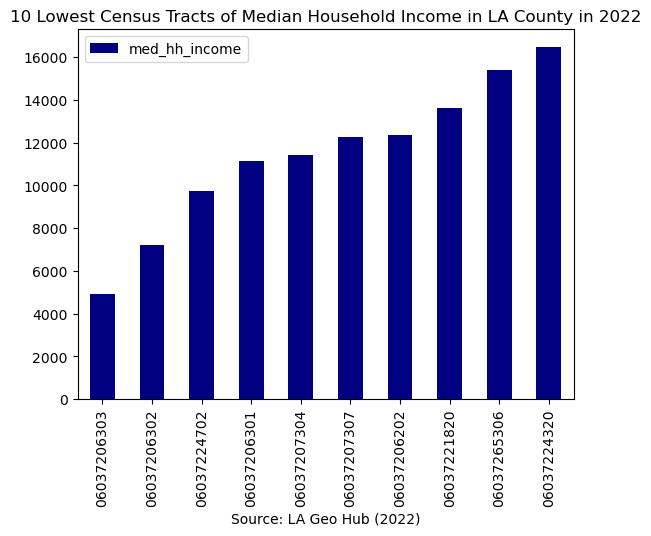

In [41]:
df_sorted.head(10).plot.bar(x='tract',
                             y='med_hh_income',
                             title='10 Lowest Census Tracts of Median Household Income in LA County in 2022',
                             color='navy',
                            xlabel='Source: LA Geo Hub (2022)')

In [33]:
# The data shows that median income for the ten lowest census tracts in LA County range from $4,918 to $16,471.

In [34]:
df_high = df.sort_values(by='med_hh_income',ascending = False)

In [35]:
df_high [['med_hh_income', 'spa']].head(10)

,med_hh_income,spa
1303,250001.0,SPA 5 - West
1308,250001.0,SPA 5 - West
1930,250001.0,SPA 2 - San Fernando
1307,250001.0,SPA 5 - West
2090,250001.0,SPA 5 - West
1196,250000.0,SPA 8 - South Bay
1309,246750.0,SPA 5 - West
1384,236709.0,SPA 2 - San Fernando
1305,231188.0,SPA 5 - West
2375,228836.0,SPA 4 - Metro


<Axes: title={'center': '10 Highest Census Tracts of Median Household Income in LA County in 2022'}, xlabel='Source: LA Geo Hub (2022)'>

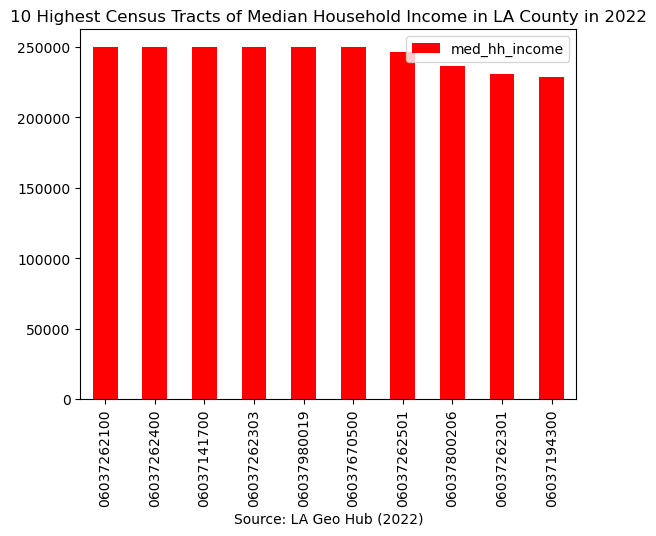

In [40]:
df_high.head(10).plot.bar(x='tract',
                             y='med_hh_income',
                             title='10 Highest Census Tracts of Median Household Income in LA County in 2022',
                             color='red',
                            xlabel='Source: LA Geo Hub (2022)')

In [42]:
# We can see the 10 highet census tracts in LA County all have a median income over $200,000 a year. 

In [45]:
import geopandas as gpd

In [48]:
# Moving onto the mapping portion of the assignment. I'll upload the data file and make sure it's read correctly.

In [47]:
df2=gpd.read_file('Census_Tracts_2020.geojson')
df2.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [52]:
# Subsetting the data to make our lives easier hopefully.
df2 = df2[['CT20','geometry']]
df2.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [ ]:
# creating a tract column 

In [56]:
# CA =06 LA County=037
df2['tract'] ='06' + '037' + df2 ['CT20']

In [62]:
# Checking it now. 

In [57]:
df2.head()

,CT20,geometry,tract
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [58]:
# Merging the data, wish me luck. 

In [59]:
mapped=df2.merge(df,on="tract")

In [60]:
mapped.head()

,CT20,geometry,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,74625.0,1505,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2736,1.232981e+07,14765.649004
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,93125.0,1341,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2737,2.908866e+07,30028.213771
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,55682.0,1430,Very Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2738,7.532651e+06,12504.552130
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,46274.0,1513,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2739,3.874399e+06,8938.421349
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,30016.0,969,Extremely Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,2740,3.090538e+06,9750.960420


In [61]:
# Merged it!

In [64]:
# Now mapping the median income for LA county. 

<Axes: >

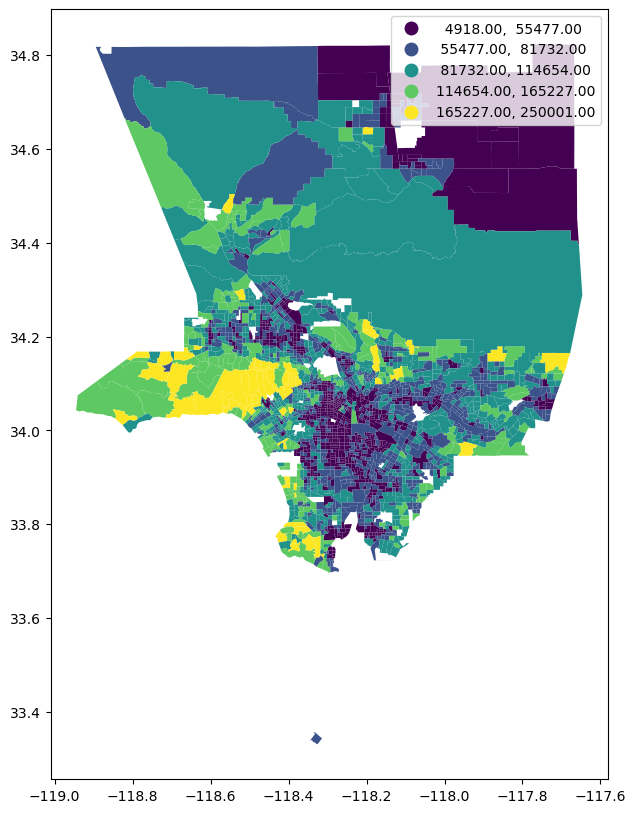

In [63]:
mapped.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='NaturalBreaks')


In [68]:
# This chart aligns with my expecations based on what we saw from the previous codes run. 
# We see higher incomes near the coastal regions of LA, whereas there is a lower median income
# for tracts located in the middle of the city and near the Antelope Valley. 

In [78]:
# This concludes Assignment #3 Census Data Exploration. 